<h3> Intro</h3><p>random forests are an example of ensemble learning built upon decision trees.<br>DT are very intuitive  for classifying or labelling objects: a series of questions can help zero in on the classification.<br>the binary splitting makes them extremely efficient and in a well constructed tree each question will cut the number of options by half, therefore quickly narrowing the options. this makes it lucrative even for large number of classes.<br>the trick is in deciding which questions to ask at each step.<br>in case of machine learning this takes the form of asxis aligned splits in the data: ie each node in the tree splits the data into two groups using a cutoff value within one of the features.<p><h3>Over Fitting</h3><p>overfitting, unfortunately, is a general trend noticed in decision trees: this happens since it is very easy to go deeper into trees and therefore to fit details of particular data rather than overall property of the distribution of the data.<p><p><h3>Random Forest</h3><p>the notion, that multiple overfitting estimators can be combined to reduce the effect of overfitting, is what underlies a method called <i><b>bagging</b></i>. this menthod makes use of parallel estimators, each of which overfit the data and averages the result to find better classification. an ensemble of randomised decision trees is called a random forest.<br>these can be made to work as regressors too.

<h1>Classifying Digits using Random Forest

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, RandomForestRegressor

E:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

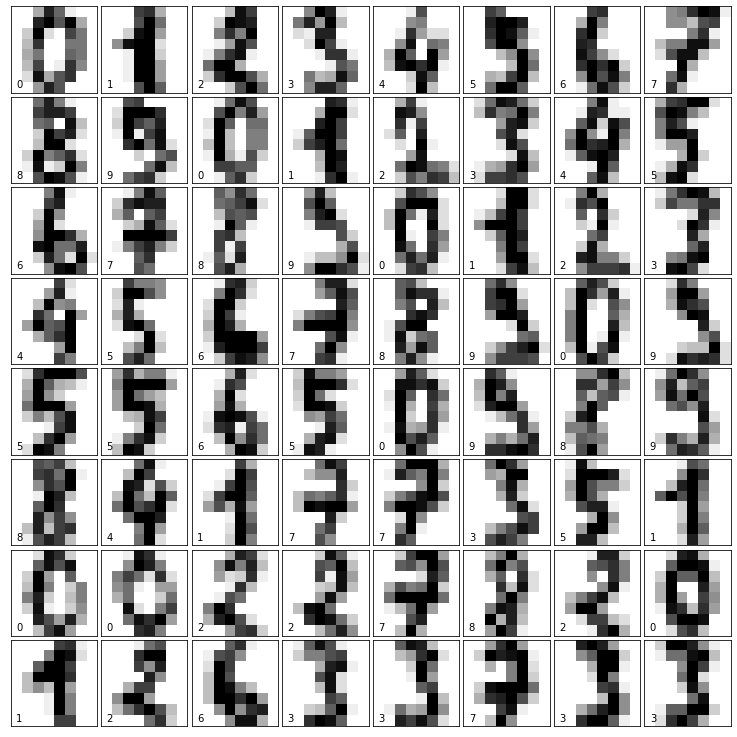

In [5]:
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [8]:
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.98      1.00      0.99        43
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



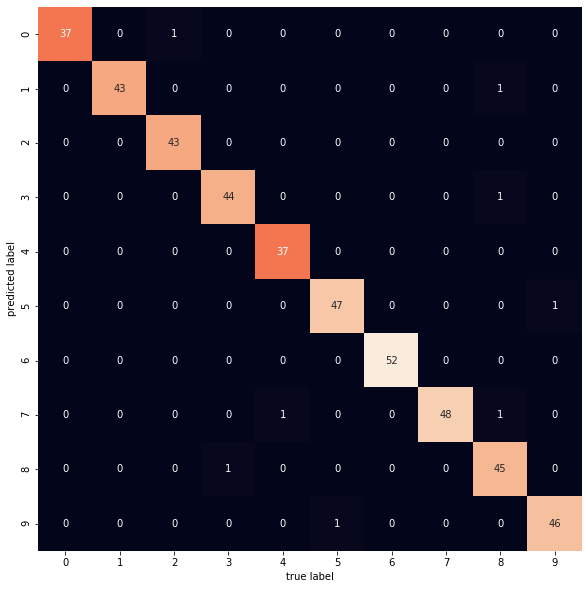

In [9]:
mat = confusion_matrix(ytest, ypred)
plt.subplots(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');